In [1]:
import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from server_pull import *

In [2]:
#Initialize Variables
N = 1000      # the time (or round) - 1 million
d = 24                   # number of possible variables
Qt_a = 0
Nt_a = np.zeros(d)      #number of times arm a has been selected prior to T
                        #If Nt(a) = 0, then a is considered to be a maximizing action.
c = 1                   
sum_rewards = np.zeros(d) 

hist_t = [] #holds the natural log of each round
hist_achieved_rewards = [] #holds the history of the UCB CHOSEN cumulative rewards
hist_arm_selected = []     #holds the history of the arm selected for each time
hist_best_possible_rewards = [] #holds the history of OPTIMAL cumulative rewards
hist_random_choice_rewards = [] #holds the history of RANDONMLY selected actions rewards

In [3]:
#loop through no of rounds #t = time
for t in range(1,N+1):
    UCB_Values = np.zeros(d) #array holding the ucb values. we pick the max  
    action_selected = 0
    for a in range(0, d):
        if (Nt_a[a] > 0):
            ln_t = math.log(t) #natural log of t
            hist_t.append(ln_t) #to plot natural log of t
            #calculate the UCB
            Qt_a = sum_rewards[a]/Nt_a[a]  
            UCB_Values[a] = Qt_a + c*(ln_t/Nt_a[a])
        #if this equals zero, choose as the maximum. Cant divide by negative     
        elif (Nt_a[a] == 0):
            UCB_Values[a] = 1e50 #make large value
        
    #select the max UCB value
    action_selected = np.argmax(UCB_Values)
    #update Values as of round t
    Nt_a[action_selected] += 1
    reward = pull('user7', 'XTkjktIc', action_selected)['Reward']
    sum_rewards[action_selected] += reward
    hist_achieved_rewards.append(reward)
    hist_arm_selected.append(action_selected+1)
    
    # We don't know other selections for time t. 
#     r_ = df.values[t,[1,2,3,4]]     #get all rewards for time t to a vector
#     r_best = r_[np.argmax(r_)]      #select the best action
    
#     pick_random = random.randrange(d) #choose an action randomly
#     r_random = r_[pick_random] #np.random.choice(r_) #select reward for random action
#     if len(hist_achieved_rewards)>0:
#         hist_achieved_rewards.append(hist_achieved_rewards[-1]+reward)
# #         hist_best_possible_rewards.append(hist_best_possible_rewards[-1]+r_best)
#         hist_random_choice_rewards.append(hist_random_choice_rewards[-1]+r_random)
#     else:
#         
#         hist_best_possible_rewards.append(r_best)
#         hist_random_choice_rewards.append(r_random)

In [4]:
print(len(np.array(range(1,N+1))))
print(len(hist_achieved_rewards))
print(len(hist_arm_selected))
print(len(sum_rewards))
print(len(Nt_a))

1000
1000
1000
24
24


In [5]:
# Output the results(1000 pulls)
pull_hist = pd.DataFrame({'t': np.array(range(1,N+1)), 
                          'rewards': hist_achieved_rewards, 
                          'arm_selected': hist_arm_selected})
results = pd.DataFrame({'Num_arms_selected': Nt_a, 'Sum_rewards_arms': sum_rewards})

In [6]:
pull_hist.to_csv('pull_hist.csv')
results.to_csv('pull_results.csv')

In [7]:
# Number of times each arm was Selected
sum_rewards

array([1.0000e+01, 3.3000e+01, 6.3000e+01, 1.6000e+01, 1.2000e+01,
       1.0800e+02, 8.2000e+01, 1.4000e+01, 3.7000e+01, 1.1100e+02,
       4.1000e+01, 7.0000e+00, 1.1500e+02, 1.1000e+01, 1.7000e+01,
       1.3000e+01, 2.3443e+04, 6.0000e+00, 7.0000e+00, 1.6000e+01,
       1.7000e+01, 1.0000e+01, 4.0000e+00, 1.7000e+01])

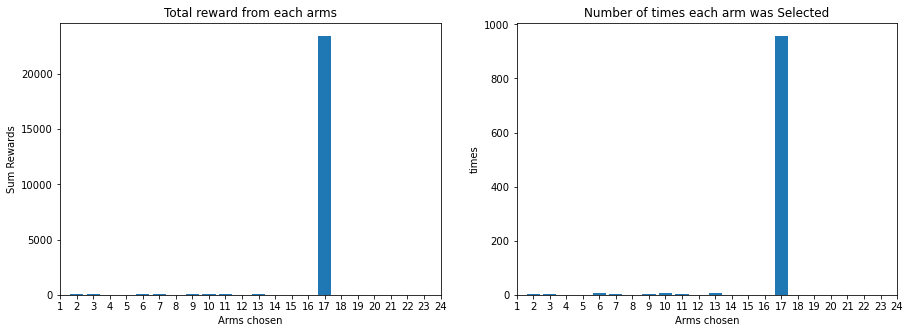

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.bar(range(1,25),sum_rewards)
plt.title("Total reward from each arms")
plt.xlabel('Arms chosen')
plt.ylabel('Sum Rewards')
plt.xticks(range(1,25))
plt.xlim(1,24)

plt.subplot(122)
plt.bar(range(1,25),Nt_a)
plt.title("Number of times each arm was Selected")
plt.xlabel('Arms chosen')
plt.ylabel('times')
plt.xticks(range(1,25))
plt.xlim(1,24)
plt.show()

In [10]:
avg = []
for i in range(len(sum_rewards)):
    if Nt_a[i] == 0:
        avg.append(0)
    else:
        avg.append(sum_rewards[i]/Nt_a[i])
print(avg)
regret = max(avg)*N-sum(sum_rewards)
print(regret)

[10.0, 16.5, 21.0, 16.0, 12.0, 21.6, 20.5, 14.0, 18.5, 22.2, 20.5, 7.0, 23.0, 11.0, 17.0, 13.0, 24.49634273772205, 6.0, 7.0, 16.0, 17.0, 10.0, 4.0, 17.0]
286.3427377220505


In [ ]:
# reward = pull('user7', 'XTkjktIc', action_selected)
# reward